<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/jvcqp2iy2jlx2b32rmzdt0tx8lvxgzkp.png" width = 300, align = "center"></a>

# <center>LINEAR REGRESSION WITH TENSORFLOW</center>

<strong>In this notebook we will overview the implementation of Linear Regression with TensorFlow</strong>
<br>
- <p><a href="#ref1">Linear Regression</a></p>
- <p><a href="#ref2">Linear Regression with TensorFlow</a></p>
- <p><a href="#ref3">Practice Exercises</a></p>
<p></p>
<br>

----------------

<a id="ref1"></a>
# Linear Regression

Defining a linear regression in simple terms, its the approximation of a linear model used to describe the relationship betweeen two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. When multiple dependent variables are predicted the process is known as multivariate linear regression.

The very known equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>a</b> and <b>b</b> being the parameters we adjust. <b> a </b> is known as "slope" or "gradient" and <b> b </b> as "intercept". You can interpret this equation as Y being a function of X, or Y being dependent of X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable axis.

Let's first import packages:

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Let's define an independent variable:

In [2]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

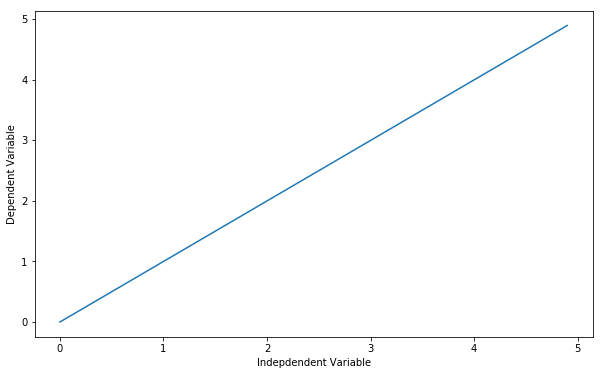

In [3]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a*X + b 

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

OK... but how can we see this concept of linear relations with a more meaningful point of view?

Simple linear relations were used to try to describe and quantify many observable physical phenomena, the easiest to understand are speed and distance traveled:

<b><pre>

Distance Traveled = Speed * Time + Initial Distance

Speed = Acceleration * Time + Initial Speed
</pre></b>

They are also used to describe properties of different materials:

<b><pre>

Force = Deformation * Stiffness 

Heat Transfered = Temperature Difference * Thermal Conductivity 

Electrical Tension (Voltage) = Electrical Current * Resistance

Mass =  Volume * Density
</pre></b>

When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So how is this "regression" performed?

---------------

<a id="ref2"></a>
# Linear Regression with TensorFlow
<h6>A simple example of a linear function can help us understand the basic mechanism behind TensorFlow. </h6>

For the first part we will generate random data points and define a linear relation, we'll use TensorFlow to adjust and get the right parameters.


In [4]:
x_data = np.random.rand(100).astype(np.float32)
x_data

array([ 0.8069424 ,  0.82380921,  0.47323173,  0.65605032,  0.36789858,
        0.64389682,  0.1021762 ,  0.28804943,  0.4575946 ,  0.16076741,
        0.29175562,  0.92417002,  0.52064264,  0.67878377,  0.92375672,
        0.27416939,  0.48383537,  0.55513424,  0.40589008,  0.26138571,
        0.25507191,  0.69656056,  0.11197592,  0.36124167,  0.10682904,
        0.82654792,  0.94804925,  0.06867265,  0.79771674,  0.87115562,
        0.72897887,  0.80280596,  0.7875433 ,  0.76229954,  0.9087314 ,
        0.27152544,  0.74453259,  0.39322233,  0.79609245,  0.92076528,
        0.51450044,  0.98224258,  0.57831019,  0.18277317,  0.28040034,
        0.08206961,  0.3660602 ,  0.48133764,  0.06218942,  0.05419961,
        0.35599145,  0.03274485,  0.72121048,  0.95987159,  0.37549755,
        0.64061081,  0.32728142,  0.64629626,  0.31185186,  0.31223845,
        0.79687709,  0.01520815,  0.19722846,  0.77266091,  0.22105347,
        0.91552651,  0.47566482,  0.43623444,  0.49171835,  0.80

The equation for the model used in this example is :

$$Y = 3 X + 2 $$


Nothing special about this equation, it is just a model that we use to generate our data points. In fact, you can change the parameters to whatever you want, as you will do later. We add some gaussian noise to the points to make it a bit more interesting.

In [5]:
y_data = x_data * 3 + 2
y_data

array([ 4.42082691,  4.47142792,  3.41969514,  3.96815109,  3.10369587,
        3.93169045,  2.30652857,  2.86414814,  3.37278366,  2.48230219,
        2.87526679,  4.77251005,  3.5619278 ,  4.0363512 ,  4.77127028,
        2.8225081 ,  3.45150614,  3.66540265,  3.2176702 ,  2.78415728,
        2.76521587,  4.08968163,  2.33592772,  3.08372498,  2.32048702,
        4.47964382,  4.84414768,  2.20601797,  4.39315033,  4.61346674,
        4.18693638,  4.4084177 ,  4.36262989,  4.28689861,  4.72619438,
        2.81457639,  4.23359776,  3.179667  ,  4.38827705,  4.76229572,
        3.54350138,  4.94672775,  3.73493052,  2.54831958,  2.84120107,
        2.24620891,  3.09818053,  3.44401288,  2.18656826,  2.16259885,
        3.06797433,  2.09823465,  4.16363144,  4.87961483,  3.1264925 ,
        3.92183256,  2.98184419,  3.93888879,  2.93555546,  2.93671536,
        4.3906312 ,  2.04562449,  2.5916853 ,  4.31798267,  2.66316032,
        4.74657965,  3.42699432,  3.30870342,  3.47515512,  4.40

In [6]:
y_data = np.vectorize(lambda y: y + np.random.normal(loc = 0.0, scale = 0.1))(y_data)
y_data

array([ 4.45079618,  4.47545068,  3.53194194,  3.85108555,  2.96040809,
        3.9574796 ,  2.25075528,  2.7575861 ,  3.38477485,  2.43918782,
        2.78392094,  4.94685573,  3.73222985,  4.08456982,  4.84600924,
        2.77297585,  3.33647161,  3.57950038,  3.24941424,  2.75775627,
        2.62869901,  4.12182693,  2.2567066 ,  3.24763129,  2.30356671,
        4.52712834,  4.89275035,  2.17153948,  4.1909166 ,  4.62019443,
        4.2627153 ,  4.30047835,  4.39914752,  4.47996039,  4.77817965,
        2.91644308,  4.01926903,  3.30687819,  4.34753301,  4.79556691,
        3.5879449 ,  4.88515067,  3.74440245,  2.44739112,  2.93750467,
        2.11100385,  3.11390582,  3.32864087,  2.2320698 ,  2.09715823,
        3.09963459,  2.23833   ,  4.18263011,  4.88505137,  3.00367124,
        3.96536873,  2.72407281,  4.03785822,  2.97471507,  2.822155  ,
        4.35849301,  2.00944416,  2.76033079,  4.37051572,  2.62487285,
        4.84406933,  3.5527446 ,  3.27933064,  3.43457232,  4.54

Here is a sample of data:

In [7]:
zip(x_data,y_data) [0:5]

[(0.8069424, 4.4507961828592517),
 (0.82380921, 4.4754506777248499),
 (0.47323173, 3.53194194178415),
 (0.65605032, 3.8510855534435868),
 (0.36789858, 2.9604080914494095)]

First, we initialize the variables __a__ and __b__, with any random guess, and then we define the linear function:

In [8]:
a = tf.Variable(1.0)  # slope
b = tf.Variable(0.2)  # intercept
y = a * x_data + b    # y, not y_data

In a linear regression, we minimize the squared error of the equation that we want to adjust minus the target values (the data that we have), so we define the equation to be minimized as loss.

To find Loss's value, we use __`tf.reduce_mean()`__. <span style="background-color:yellow;">This function finds the mean of a multidimensional tensor</span>, and the result can have a diferent dimension.

In [9]:
loss = tf.reduce_mean(tf.square(y - y_data))

Then, we define the optimizer method. Here we will use a simple gradient descent with <span style="background-color:yellow;">a learning rate of 0.5</span>: <br/>  
Now we will define the training method of our graph, what method we will use for minimize the loss? We will use the __`tf.train.GradientDescentOptimizer`__. <br>
__`.minimize()`__ will <span style="background-color:yellow;">minimize the error function of our optimizer</span>, resulting in a better model.

In [14]:
# instantiate a new GradientDescentOptimizer object
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Don't forget to initialize the variables before executing a graph:

In [11]:
# initialize the variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Now we are ready to start the optimization and run the graph:

In [12]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

(0, [2.5896509, 3.0173328])
(5, [2.4736538, 2.2864544])
(10, [2.6329463, 2.2015977])
(15, [2.7496769, 2.1385021])
(20, [2.8354993, 2.0921149])
(25, [2.8985968, 2.0580103])
(30, [2.9449868, 2.0329361])
(35, [2.9790933, 2.0145013])
(40, [3.0041685, 2.0009482])
(45, [3.0226042, 1.9909836])
(50, [3.0361583, 1.9836576])
(55, [3.0461235, 1.9782714])
(60, [3.0534499, 1.9743114])
(65, [3.0588362, 1.9714])
(70, [3.0627964, 1.9692595])
(75, [3.0657082, 1.9676858])
(80, [3.0678489, 1.9665287])
(85, [3.0694227, 1.965678])
(90, [3.0705798, 1.9650526])
(95, [3.0714304, 1.9645928])


In [19]:
train_data[:5]

[[2.5896509, 3.0173328],
 [2.4736538, 2.2864544],
 [2.6329463, 2.2015977],
 [2.7496769, 2.1385021],
 [2.8354993, 2.0921149]]

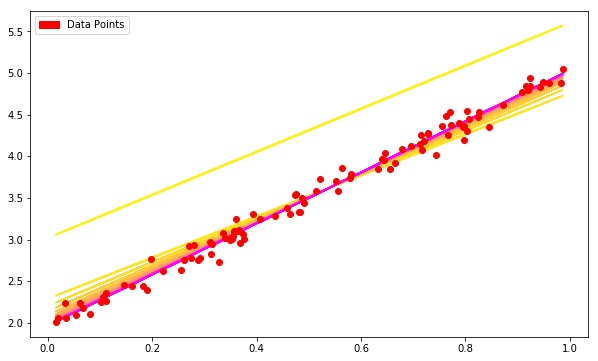

In [13]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

---------------

## Want to learn more?

Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The PowerAI platform supports popular machine learning libraries and dependencies including Tensorflow, Caffe, Torch, and Theano. You can download a [free version of PowerAI](https://cocl.us/ML0120EN_PAI).

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0120EN_DSX)This is the end of this lesson. Hopefully, now you have a deeper and intuitive understanding regarding the LSTM model. Thank you for reading this notebook, and good luck on your studies.

### Thanks for completing this lesson!

If you are familiar with some of these methods and concepts, this tutorial might have been boring for you, but it is important to get used to the TensorFlow mechanics, and feel familiar and comfortable using it, so you can build more complex algorithms in it.

Created by <a href="https://ca.linkedin.com/in/rafaelblsilva"> Rafael Belo Da Silva</a><br />
Linear Regression plot by Hugo Sales Correa

This tutorial was inspired by the documentation of TensorFlow : https://www.tensorflow.org/versions/r0.9/get_started/index.html <br>
